<a href="https://colab.research.google.com/github/paolopetta/FIA-Yourbook/blob/main/Yourbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Import delle librerie necessarie
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import requests

In [43]:
#Import dei dataset con le informazioni:
#user.cvs -> info sugli utenti
#book.cvs -> info su i libri
#ratings.cvs -> votazioni che utenti hanno dati ai libri
#Inoltre, l'import elimina tutte le righe dei dataset che non sono corrette 
users = pd.read_csv('Users.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
books = pd.read_csv('Books.csv', error_bad_lines=False, delimiter=';', engine = 'python' , encoding = 'ISO-8859-1')
ratings = pd.read_csv('Ratings.csv', error_bad_lines=False, delimiter=';', engine = 'python' , encoding = 'ISO-8859-1')

Skipping line 815: ';' expected after '"'
Skipping line 1679: ';' expected after '"'
Skipping line 2531: ';' expected after '"'
Skipping line 2640: ';' expected after '"'
Skipping line 3236: ';' expected after '"'
Skipping line 3256: ';' expected after '"'
Skipping line 4906: ';' expected after '"'
Skipping line 6452: ';' expected after '"'
Skipping line 8349: ';' expected after '"'
Skipping line 9669: ';' expected after '"'
Skipping line 9723: ';' expected after '"'
Skipping line 10010: ';' expected after '"'
Skipping line 10192: ';' expected after '"'
Skipping line 10754: ';' expected after '"'
Skipping line 10824: ';' expected after '"'
Skipping line 10862: ';' expected after '"'
Skipping line 11442: ';' expected after '"'
Skipping line 11584: ';' expected after '"'
Skipping line 11859: ';' expected after '"'
Skipping line 12206: ';' expected after '"'
Skipping line 12229: ';' expected after '"'
Skipping line 12719: ';' expected after '"'
Skipping line 12885: ';' expected after '"'


Skipping line 73880: ';' expected after '"'
Skipping line 74291: ';' expected after '"'
Skipping line 75043: ';' expected after '"'
Skipping line 75071: ';' expected after '"'
Skipping line 76445: ';' expected after '"'
Skipping line 76492: ';' expected after '"'
Skipping line 76844: ';' expected after '"'
Skipping line 77231: ';' expected after '"'
Skipping line 77336: ';' expected after '"'
Skipping line 77781: ';' expected after '"'
Skipping line 77835: ';' expected after '"'
Skipping line 78089: ';' expected after '"'
Skipping line 78186: ';' expected after '"'
Skipping line 78524: ';' expected after '"'
Skipping line 78752: ';' expected after '"'
Skipping line 79118: ';' expected after '"'
Skipping line 79320: ';' expected after '"'
Skipping line 79725: ';' expected after '"'
Skipping line 79909: ';' expected after '"'
Skipping line 79974: ';' expected after '"'
Skipping line 81924: ';' expected after '"'
Skipping line 83588: ';' expected after '"'
Skipping line 83609: ';' expecte

Skipping line 153921: ';' expected after '"'
Skipping line 154493: ';' expected after '"'
Skipping line 154607: ';' expected after '"'
Skipping line 154679: ';' expected after '"'
Skipping line 155080: ';' expected after '"'
Skipping line 155149: ';' expected after '"'
Skipping line 155677: ';' expected after '"'
Skipping line 155754: ';' expected after '"'
Skipping line 155966: ';' expected after '"'
Skipping line 156172: ';' expected after '"'
Skipping line 156273: ';' expected after '"'
Skipping line 156883: ';' expected after '"'
Skipping line 157128: ';' expected after '"'
Skipping line 158326: ';' expected after '"'
Skipping line 158329: ';' expected after '"'
Skipping line 158333: ';' expected after '"'
Skipping line 158540: ';' expected after '"'
Skipping line 158567: ';' expected after '"'
Skipping line 159031: ';' expected after '"'
Skipping line 159966: ';' expected after '"'
Skipping line 160139: ';' expected after '"'
Skipping line 160946: ';' expected after '"'
Skipping l

Skipping line 231244: ';' expected after '"'
Skipping line 231272: ';' expected after '"'
Skipping line 231617: ';' expected after '"'
Skipping line 231800: ';' expected after '"'
Skipping line 231890: ';' expected after '"'
Skipping line 232328: ';' expected after '"'
Skipping line 232561: ';' expected after '"'
Skipping line 233014: ';' expected after '"'
Skipping line 233056: ';' expected after '"'
Skipping line 233917: ';' expected after '"'
Skipping line 233999: ';' expected after '"'
Skipping line 234353: ';' expected after '"'
Skipping line 234467: ';' expected after '"'
Skipping line 235072: ';' expected after '"'
Skipping line 236109: ';' expected after '"'
Skipping line 236438: ';' expected after '"'
Skipping line 236718: ';' expected after '"'
Skipping line 237419: ';' expected after '"'
Skipping line 237452: ';' expected after '"'
Skipping line 237995: ';' expected after '"'
Skipping line 238317: ';' expected after '"'
Skipping line 238333: ';' expected after '"'
Skipping l

In [44]:
#Inizia la fase di preparazione dei dati di ratings
#Rimuoviamo tutti i duplicati presenti
ratings.drop_duplicates(inplace=True, keep='first')
#Rimuoviamo le righe di rating che sono nulle
ratings = ratings.dropna()
#stampiamo la dimesione della tabella di ratings
print(ratings.shape)
#stampiamo la media delle votazioni
ratings['Book-Rating'].mean()
#rimuoviamo da rating tutte le votazioni dei libri uguali a 0
ratings = ratings[ratings['Book-Rating'] != 0]
ratings.info()

(1149766, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 433659 entries, 1 to 1149765
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433659 non-null  int64 
 1   ISBN         433659 non-null  object
 2   Book-Rating  433659 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


In [45]:
#Inizia la fase di preparazione dei dati di user
#stampiamo le informazioni di user-id
users['User-ID'].describe()
#andiamo ad eliminare tutti gli user che sono null
users_df0 = users.dropna()
#Gli userid erano scritti come float e li trasformiamo in int
users_df0['User-ID'].astype(np.int64)

1              2
3              4
5              6
9             10
10            11
           ...  
278848    278849
278850    278851
278851    278852
278852    278853
278854    278855
Name: User-ID, Length: 168096, dtype: int64

In [46]:
#Merge tra ratings e user
B1 = pd.merge(ratings, users_df0, on='User-ID', how='left')

In [47]:
#Merge b1 e books
B2 = pd.merge(B1, books, on='ISBN', how='left')
#Cancelliamo tutti i dati che sono null
B3 = B2.dropna()
#Abbiamo ottenuto una tabella unita e di molto ridotta rispetto alle tabelle iniziali
print(B3.shape)
#Rinominiamo le colonne
B3.rename(columns={
    'User-ID': 'User_ID', 
    'Book-Rating': 'Book_Rating', 
    'Book-Title': 'Book_Title',
    'Book-Author': 'Book_Author',
    'Year-Of-Publication': 'Year_Of_Publication'
}, inplace=True)
B3.info()
bn = B3["Book_Title"].value_counts()
B3["User_ID"].value_counts()
user = B3['User_ID'].astype("str")
user.describe()

(268917, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268917 entries, 1 to 433657
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User_ID              268917 non-null  int64  
 1   ISBN                 268917 non-null  object 
 2   Book_Rating          268917 non-null  int64  
 3   Location             268917 non-null  object 
 4   Age                  268917 non-null  float64
 5   Book_Title           268917 non-null  object 
 6   Book_Author          268917 non-null  object 
 7   Year_Of_Publication  268917 non-null  float64
 8   Publisher            268917 non-null  object 
 9   Image-URL-S          268917 non-null  object 
 10  Image-URL-M          268917 non-null  object 
 11  Image-URL-L          268917 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 26.7+ MB


C:\Users\pavil\miniconda3\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


count     268917
unique     40490
top        98391
freq        5687
Name: User_ID, dtype: object

In [48]:
#Eliminiamo tutti gli utenti che hanno età >= 80 || <= 10
B4 = B3.drop(B3[B3['Age'] >= 80].index)
B4 = B4.drop(B4[B4['Age'] <= 10].index)
B4.shape

(265986, 12)

In [49]:
#Eliminiarmo tutti i libri pubblicati dal 2010 in poi e prima del 1200
B4 = B4.drop(B4[B4['Year_Of_Publication'] >= 2010].index)
B4 = B4.drop(B4[B4['Year_Of_Publication'] <= 1200].index)
B4['Year_Of_Publication'].describe()
B4.shape

(261900, 12)

In [50]:
#Contiamo quanti titoli sono presenti
bn = B4["Book_Title"].value_counts()
bn

Wild Animus                                            471
The Lovely Bones: A Novel                              468
The Da Vinci Code                                      378
The Secret Life of Bees                                277
Bridget Jones's Diary                                  260
                                                      ... 
Christopher                                              1
Lincoln Logs                                             1
Spellbound (Magical Love)                                1
Wild Girls: The Path of the Young Goddess                1
College Girls (Sweet Valley University (Paperback))      1
Name: Book_Title, Length: 105983, dtype: int64

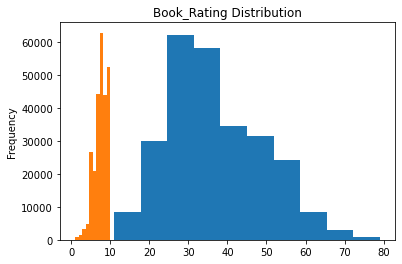

In [51]:
#Assegnamo a user tutti gli id e ne eliminiamo i duplicati
user = B4['User_ID']
user.drop_duplicates(inplace=True, keep='first') 

#grafico che rappresenta la frequenza delle votazioni e la frequenza di una determinata età degli utenti
#x (da 0 a 10) votazione dei libri, (da 11 a 80) età degli utenti
#y frequenza di questi componenti
user = pd.merge(user, B4, on='User_ID', how='left')
user['Age'].plot(kind='hist', title='Age Distribution',)
B4['Book_Rating'].plot(kind='hist', title='Book_Rating Distribution',)
user = B4['User_ID'].astype("str")

In [52]:
B4["User_ID"].value_counts()

98391     5687
153662    1831
235105    1017
16795      953
171118     951
          ... 
97816        1
99847        1
236996       1
245184       1
82280        1
Name: User_ID, Length: 39401, dtype: int64

In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite

In [54]:
#dataset su cui lavorare, ancora da modificare
data = B4
#stampa dei primi 20 elmenti
data.head(20)
data['ISBN'] = pd.to_numeric(data['ISBN'],errors='coerce')
data.dropna(inplace=True)
data.head()
#eliminazione delle immagini
data.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240441 entries, 2 to 433657
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User_ID              240441 non-null  int64  
 1   ISBN                 240441 non-null  float64
 2   Book_Rating          240441 non-null  int64  
 3   Location             240441 non-null  object 
 4   Age                  240441 non-null  float64
 5   Book_Title           240441 non-null  object 
 6   Book_Author          240441 non-null  object 
 7   Year_Of_Publication  240441 non-null  float64
 8   Publisher            240441 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 18.3+ MB


In [55]:
G = nx.Graph()
m=list(data['User_ID'])
n=list(data['Book_Title'])
zip_list=list(zip(m,n))
# Add nodes with the node attribute "bipartite"
G.add_nodes_from(m, bipartite=0)
G.add_nodes_from(n, bipartite=1)
G.add_edges_from(list(zip(m,n))) 
    
bipartite.is_bipartite(G)
#G.adj

True

In [56]:
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

In [57]:
cent = nx.degree_centrality(G)
name = []
centrality = []

for key, value in cent.items():
    name.append(key)
    centrality.append(value)

cent = pd.DataFrame()    
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by='centrality', ascending=False)

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [59]:
data1 = data.copy()

In [60]:
#eliminiamo altri dati inutili
data.drop(['Book_Title','Publisher','Location'],axis=1,inplace=True)
#stampa dei dati risultanti
data.head()
data.info()
#prendiamo i get dummies su bookauthor
data_encoded = pd.get_dummies(data, columns=["Book_Author"], sparse=True)                  
data_encoded
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240441 entries, 2 to 433657
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User_ID              240441 non-null  int64  
 1   ISBN                 240441 non-null  float64
 2   Book_Rating          240441 non-null  int64  
 3   Age                  240441 non-null  float64
 4   Book_Author          240441 non-null  object 
 5   Year_Of_Publication  240441 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 12.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 240441 entries, 2 to 433657
Columns: 46760 entries, User_ID to Book_Author_Ã?Â?pictÃ?Â¨te
dtypes: Sparse[uint8, 0](46755), float64(3), int64(2)
memory usage: 12.2 MB


In [61]:
# minmax scaler (this part is referred from HW2)
scaler = MinMaxScaler()

#andiamo a creare i dataset per il training e il test
#molto ridotti per mancanza di capacità di elaborazione
train = data_encoded[:1000]
test = data_encoded[1001:1101]

#train, test = np.split(data_encoded.sample(frac=0.01), [int(.6*len(data_encoded))], [int(.4*len(data_encoded))])
#print(train)
#print(test)

#train_X,test_X = train_test_split(data_encoded, test_size=0.3, random_state=930)
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
data_encoded.info()

C:\Users\pavil\miniconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\pavil\miniconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\pavil\miniconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 240441 entries, 2 to 433657
Columns: 46760 entries, User_ID to Book_Author_Ã?Â?pictÃ?Â¨te
dtypes: Sparse[uint8, 0](46755), float64(3), int64(2)
memory usage: 12.2 MB


In [62]:
X = scaler.transform(data_encoded[:1000])

C:\Users\pavil\miniconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [63]:
K = range(1, 7)
meanDispersions = [] 
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    
    meanDispersions.append(kmeans.inertia_)    

C:\Users\pavil\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


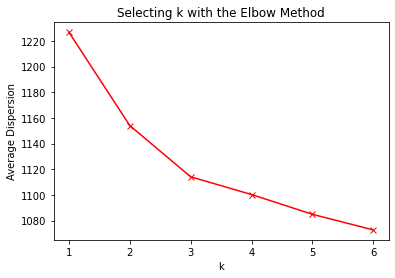

In [64]:
#grafico di punto di gomito
plt.plot(K, meanDispersions, 'rx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show() 

In [65]:
#Applicazione dell'algoritmo Kmeans
#si è scelto 2 dopo vari tentativi
kmeans = KMeans(n_clusters=2)

y1 = kmeans.fit_predict(X_train)
y2 = kmeans.predict(X_test)
whole_data = kmeans.predict(X)

#generate two subsets with data generated from last step 
train = pd.DataFrame(X_train, columns = data_encoded.columns)
test = pd.DataFrame(X_test, columns = data_encoded.columns)
#then add the prediction of clustering to these data
train['Cluster'] = y1
test['Cluster'] = y2
data1= data1[:1000]
data1['Cluster']= whole_data

In [66]:
#Controlliamo il risultato di ogni cluster
groupby1 = data1.groupby(by='Cluster').mean()
groupby1

,User_ID,ISBN,Book_Rating,Age,Year_Of_Publication
Cluster,,,,,
0,277713.794078,6.700933e+08,7.629879,42.895020,1995.541050
1,276978.688716,2.685977e+09,7.665370,25.595331,1996.657588


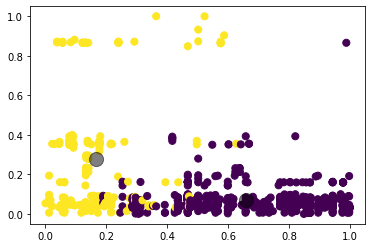

In [67]:
plt.scatter(X[:, 0], X[:, 1], c=y1, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(X, y1)
print("Valore di silhouette: " + str(score))
  

Valore di silhouette: 0.07163319196493856


In [69]:
merged = ratings.merge(books, on = 'ISBN')
merged.head()
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382827 entries, 0 to 382826
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              382827 non-null  int64 
 1   ISBN                 382827 non-null  object
 2   Book-Rating          382827 non-null  int64 
 3   Book-Title           382827 non-null  object
 4   Book-Author          382826 non-null  object
 5   Year-Of-Publication  382827 non-null  int64 
 6   Publisher            382825 non-null  object
 7   Image-URL-S          382827 non-null  object
 8   Image-URL-M          382827 non-null  object
 9   Image-URL-L          382827 non-null  object
dtypes: int64(3), object(7)
memory usage: 32.1+ MB


In [70]:
#merge dei dati con il numero di votazioni
merged_groupby=merged.groupby('Book-Title')['Book-Rating'].count().reset_index()
merged_groupby.rename(columns={'Book-Rating':'number_of_ratings'},inplace=True)
#filtriamo i libri con più di 30 votazioni
merged_groupby=merged_groupby[merged_groupby['number_of_ratings']>30]
merged_groupby.head()

,Book-Title,number_of_ratings
440,1984,144
470,1st to Die: A Novel,236
546,2010: Odyssey Two,32
581,24 Hours,34
605,2nd Chance,150


In [71]:
integrated_merged=merged.merge(merged_groupby, on='Book-Title')
integrated_merged.drop_duplicates(['User-ID','Book-Title'],inplace=True)
integrated_merged.head()
integrated_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87871 entries, 0 to 88368
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              87871 non-null  int64 
 1   ISBN                 87871 non-null  object
 2   Book-Rating          87871 non-null  int64 
 3   Book-Title           87871 non-null  object
 4   Book-Author          87871 non-null  object
 5   Year-Of-Publication  87871 non-null  int64 
 6   Publisher            87871 non-null  object
 7   Image-URL-S          87871 non-null  object
 8   Image-URL-M          87871 non-null  object
 9   Image-URL-L          87871 non-null  object
 10  number_of_ratings    87871 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 8.0+ MB


In [72]:
pivot=pd.pivot_table(integrated_merged, columns='User-ID',index='Book-Title',fill_value=0,values='Book-Rating')
pivot.shape
pivot

User-ID,9,16,26,32,39,42,51,75,91,97,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1st to Die: A Novel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010: Odyssey Two,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24 Hours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2nd Chance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wuthering Heights (Penguin Classics),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Year of Wonders,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
pivot_csr=csr_matrix(pivot)
pivot_csr

<1257x29923 sparse matrix of type '<class 'numpy.int64'>'
	with 87871 stored elements in Compressed Sparse Row format>

In [74]:
#costruzione kNN models
model=NearestNeighbors(algorithm='brute')
model.fit(pivot_csr)

NearestNeighbors(algorithm='brute')

In [75]:
pivot.iloc[:,:].values.reshape(1,-1) 
distances,suggestions=model.kneighbors(pivot.iloc[55,:].values.reshape(1,-1))

In [76]:
distances
suggestions

array([[ 55, 787,  85, 602, 222]], dtype=int64)

In [77]:
for i in range(len(suggestions)):
    print(pivot.index[suggestions[i]])
    print(suggestions[i])

Index(['About a Boy (Movie Tie-In)', 'Stanislaski Brothers (Silhouette Promo)',
       'Animal Husbandry', 'Nothing Lasts Forever', 'Daddy'],
      dtype='object', name='Book-Title')
[ 55 787  85 602 222]


In [78]:
list1=list(data_encoded['Book_Title'])
list1

['Help!: Level 1',
 'The Amsterdam Connection : Level 4 (Cambridge English Readers)',
 'Little Altars Everywhere',
 'Waiting to Exhale',
 'Birdsong: A Novel of Love and War',
 'How to Deal With Difficult People',
 'The Golden Rule of Schmoozing',
 'Apricots on the Nile: A Memoir with Recipes',
 'The Girl Who Loved Tom Gordon : A Novel',
 'The Pillars of the Earth',
 'See Jane Run',
 'Die zweite Haut.',
 'Endlich Nichtraucher.',
 'Anna Karenina',
 'El Elogio de La Sombra',
 "Bridget Jones's Diary",
 'Ein Fall fÃ?Â¼r Kay Scarpetta / Ein Mord fÃ?Â¼r Kay Scarpetta. Zwei Romane in einem Band.',
 'Artemis Fowl.',
 'Storm Surge: A Quin St. James and Mike McCleary Mystery',
 'A Wrinkle In Time',
 'Richard Brautigan : A Confederate General from Big Sur, Dreaming of Babylon, and the Hawkline Monster (Three Books in the Manner of Their Original ed)',
 'The Watsons Go to Birmingham - 1963 (Yearling Newbery)',
 'La hija del CanÃ\xadbal',
 'El Diaro De Bridget Jones',
 'Bridget Jones:SobrevivirÃ©',


In [81]:
#Sistema di raccomandazione
def book_recommend(book_name):
    if book_name in list1:
        book_id = np.where(pivot.index == book_name)[0][0]
        distances, recommendations = model.kneighbors(pivot.iloc[book_id,:].values.reshape(1,-1))
        print('Racccomandazione dei libri simili a quello inserito')
        for i in range(len(recommendations)):
            if i == 0:
                print(f"Dato il libro \"{book_name}\" suggeriamo:")
            if not i:
                list2=pivot.index[recommendations[i]]
                for j in range(len(list2)):
                    print(list2[j])
    else:
        raise ValueError

In [83]:
name=input('Inserire nome libro: ')
book_recommend(name)

Inserire nome libro: Little Altars Everywhere
Racccomandazione dei libri simili a quello inserito
Dato il libro "Little Altars Everywhere" suggeriamo:
Little Altars Everywhere
Portrait of a Killer: Jack the Ripper-- Case Closed (Berkley True Crime)
The Cat Who Lived High
One Hundred Years of Solitude (Oprah's Book Club)
Nothing Lasts Forever
